In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load Dataset
df = pd.read_csv("tmdb_top_rated_movies.csv")
df.head()  # Display the first 5 rows

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count
0,278,en,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,35.0440,8.708,28176
1,238,en,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,The Godfather,36.3040,8.687,21363
2,240,en,In the continuing saga of the Corleone crime f...,1974-12-20,The Godfather Part II,17.2441,8.570,12910
3,424,en,The true story of how businessman Oskar Schind...,1993-12-15,Schindler's List,37.5490,8.564,16380
4,389,en,The defense and the prosecution have rested an...,1957-04-10,12 Angry Men,17.0033,8.548,9091


In [8]:
#Check the shape and columns
print(df.shape)
print(df.columns)

(10000, 8)
Index(['id', 'original_language', 'overview', 'release_date', 'title',
       'popularity', 'vote_average', 'vote_count'],
      dtype='object')


In [9]:
#Get a summary of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   overview           10000 non-null  object 
 3   release_date       9998 non-null   object 
 4   title              10000 non-null  object 
 5   popularity         10000 non-null  float64
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


,id,popularity,vote_average,vote_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,2.070686e+05,5.864129,6.652452,2015.950900
std,2.732769e+05,10.399510,0.741678,3215.961515
min,2.000000e+00,0.007500,4.583000,300.000000
25%,1.028450e+04,2.353925,6.126000,467.000000
50%,3.921850e+04,4.009800,6.669000,845.000000
75%,3.772632e+05,6.624200,7.200000,1999.250000
max,1.356039e+06,517.542500,8.708000,37385.000000


In [10]:
#Check for missing values
df.isnull().sum()

id                   0
original_language    0
overview             0
release_date         2
title                0
popularity           0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
#Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [24]:
#Drop rows with missing release dates
df = df.dropna(subset=['release_date'])
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
# Top 10 movies by vote_count
most_voted = df.sort_values(by='vote_count', ascending=False)
print("Top 10 Most Voted Movies:")
print(most_voted[['title', 'vote_count', 'vote_average', 'release_date']].head(10))


Top 10 Most Voted Movies:
                        title  vote_count  vote_average release_date
45                  Inception       37385         8.368   2010-07-15
17               Interstellar       36997         8.454   2014-11-05
6             The Dark Knight       33752         8.519   2008-07-16
1055                   Avatar       32163         7.588   2009-12-15
717              The Avengers       31630         7.740   2012-04-25
960                  Deadpool       31529         7.622   2016-02-09
95     Avengers: Infinity War       30438         8.235   2018-04-25
20                 Fight Club       30186         8.400   1999-10-15
10               Pulp Fiction       28593         8.489   1994-09-10
424   Guardians of the Galaxy       28459         7.904   2014-07-30


In [14]:
# Oldest movie(s)
oldest = df.sort_values(by='release_date').head(1)
print("Oldest Movie:")
print(oldest[['title', 'release_date', 'vote_average']])

# Newest movie(s)
newest = df.sort_values(by='release_date', ascending=False).head(1)
print("Newest Movie:")
print(newest[['title', 'release_date', 'vote_average']])

Oldest Movie:
                  title release_date  vote_average
405  A Trip to the Moon   1902-06-15           7.9
Newest Movie:
     title release_date  vote_average
4964   G20   2025-04-09         6.669


In [15]:
# Top 10 movies by popularity
most_popular = df.sort_values(by='popularity', ascending=False)
print("Top 10 Most Popular Movies:")
print(most_popular[['title', 'popularity', 'vote_average', 'release_date']].head(10))

Top 10 Most Popular Movies:
                                 title  popularity  vote_average release_date
7267                 A Minecraft Movie    517.5425         6.200   2025-03-31
7453  Captain America: Brave New World    329.1585         6.143   2025-02-12
4923                               G20    288.9191         6.669   2025-04-09
4964                               G20    288.9191         6.669   2025-04-09
3907                         Novocaine    272.9012         6.884   2025-03-12
2546                          Conclave    172.3536         7.187   2024-10-25
2972                           Moana 2    160.0249         7.085   2024-11-21
1615             Mufasa: The Lion King    150.0540         7.400   2024-12-18
728               Sonic the Hedgehog 3    146.1555         7.733   2024-12-19
1241         The Passion of the Christ    142.0027         7.520   2004-02-25


In [16]:
# Top 10 movies with at least 1000 votes
min_votes = 1000
top_rated = df[df['vote_count'] >= min_votes].sort_values(by='vote_average', ascending=False)
print("Top 10 Rated Movies (min 1000 votes):")
print(top_rated[['title', 'vote_average', 'vote_count', 'release_date']].head(10))

Top 10 Rated Movies (min 1000 votes):
                         title  vote_average  vote_count release_date
0     The Shawshank Redemption         8.708       28176   1994-09-23
1                The Godfather         8.687       21363   1972-03-14
2        The Godfather Part II         8.570       12910   1974-12-20
3             Schindler's List         8.564       16380   1993-12-15
4                 12 Angry Men         8.548        9091   1957-04-10
5                Spirited Away         8.537       17064   2001-07-20
6              The Dark Knight         8.519       33752   2008-07-16
7  Dilwale Dulhania Le Jayenge         8.516        4483   1995-10-20
8               The Green Mile         8.504       18023   1999-12-10
9                     Parasite         8.500       18970   2019-05-30


In [17]:
# Most frequent original languages
print("Most Frequent Original Languages:")
print(df['original_language'].value_counts().head(10))

Most Frequent Original Languages:
original_language
en    7901
fr     647
it     356
ja     282
es     183
de      97
ko      87
zh      62
cn      57
ru      50
Name: count, dtype: int64


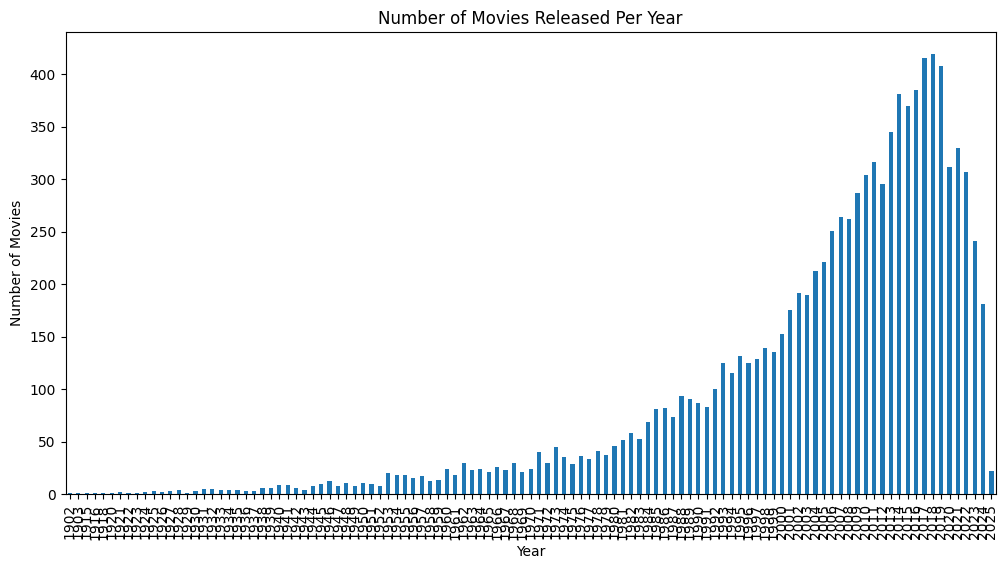

In [18]:
# Extract year from release_date
df['year'] = df['release_date'].dt.year

movies_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

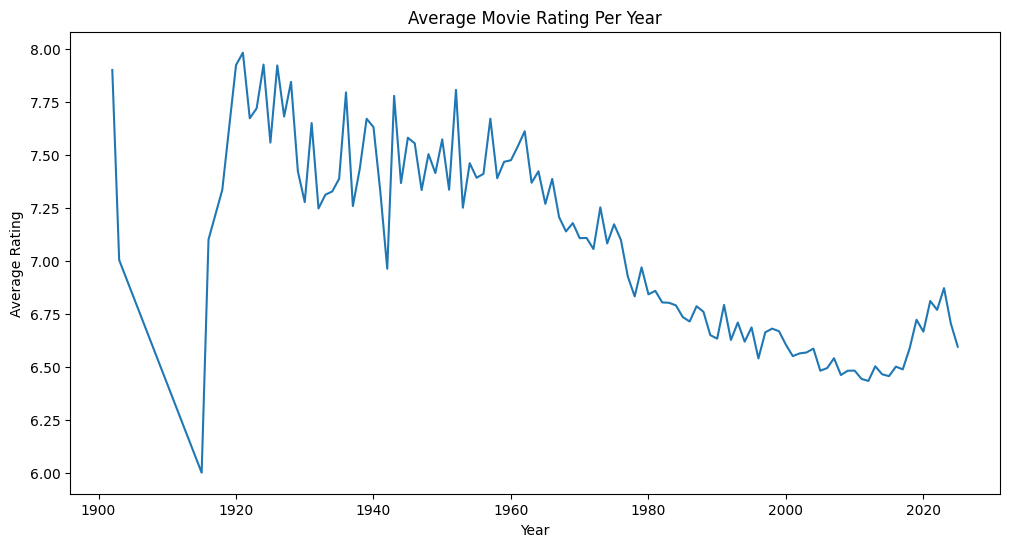

In [19]:
avg_rating_year = df.groupby('year')['vote_average'].mean()
plt.figure(figsize=(12,6))
avg_rating_year.plot()
plt.title('Average Movie Rating Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

In [20]:
# Top 5 languages with highest average rating (min 20 movies)
lang_rating = df.groupby('original_language').agg({'vote_average':'mean', 'id':'count'})
lang_rating = lang_rating[lang_rating['id'] >= 20].sort_values(by='vote_average', ascending=False)
print("Top 5 Languages by Average Rating (min 20 movies):")
print(lang_rating.head(5))

Top 5 Languages by Average Rating (min 20 movies):
                   vote_average   id
original_language                   
pt                     7.529710   31
ja                     7.347426  282
ko                     7.346161   87
hi                     7.333455   33
sv                     7.269189   37


In [21]:
# Most popular movie each year
most_popular_per_year = df.loc[df.groupby('year')['popularity'].idxmax()]
print("Most Popular Movie Each Year:")
print(most_popular_per_year[['year', 'title', 'popularity']].sort_values('year'))

Most Popular Movie Each Year:
      year                                             title  popularity
405   1902                                A Trip to the Moon      2.9215
3355  1903                           The Great Train Robbery      1.4706
8030  1915                             The Birth of a Nation      3.5338
3034  1916  Intolerance: Love's Struggle Throughout the Ages      2.8743
1919  1918                                      A Dog's Life      1.6770
...    ...                                               ...         ...
357   2021                           Spider-Man: No Way Home     35.8272
8417  2022                                365 Days: This Day     39.3367
565   2023                                          My Fault     74.9570
2546  2024                                          Conclave    172.3536
7267  2025                                 A Minecraft Movie    517.5425

[111 rows x 3 columns]


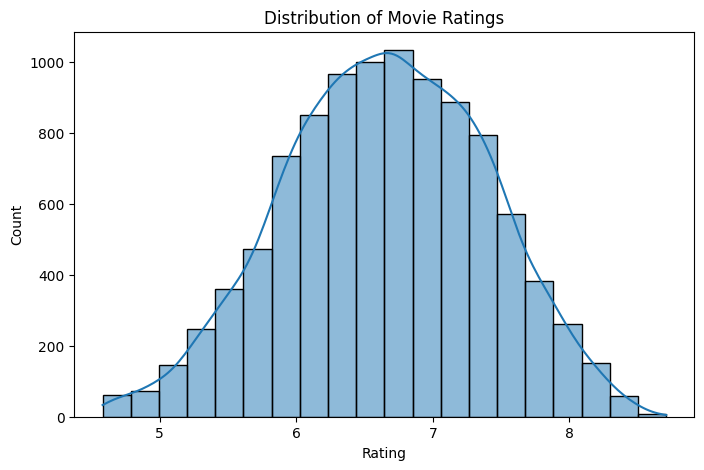

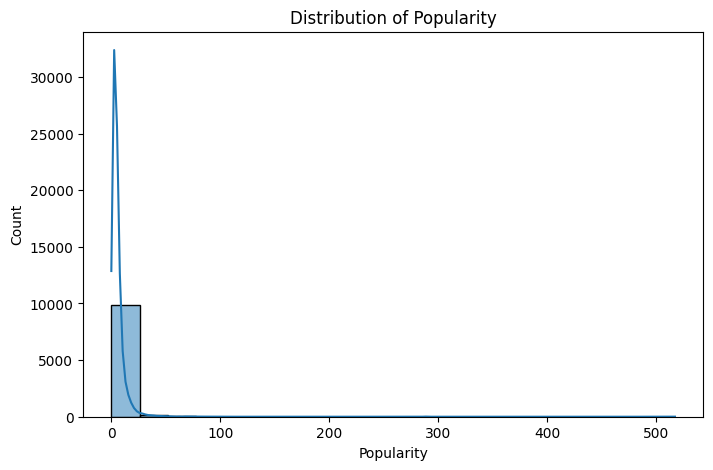

In [22]:
# Distribution of vote_average
plt.figure(figsize=(8,5))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.show()

# Distribution of popularity
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.show()